In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('./airline_passengers.csv')

In [5]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df = pd.read_csv('./airline_passengers.csv', index_col='Month', parse_dates=True)

In [7]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
train_data = df.iloc[:109]
test_data = df.iloc[109:]

<Axes: xlabel='Month'>

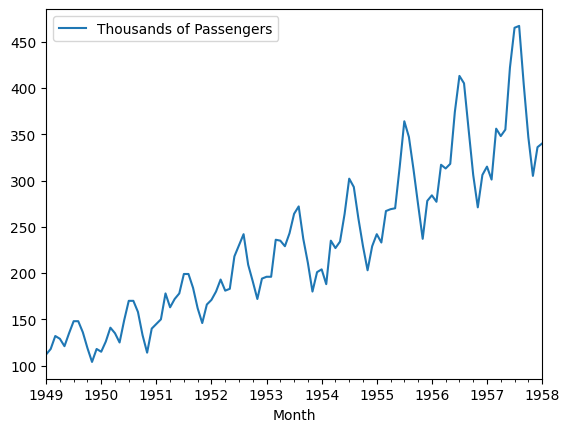

In [12]:
train_data.plot()

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
fitter_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', 
                                    seasonal='mul',seasonal_periods=12).fit()

/home/erikson/Documentos/ufmg/2023-1/PFC 1/machine learning/curso/env/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [23]:
test_predictions = fitter_model.forecast(36)

In [25]:
test_predictions.head()

1958-02-01    339.142914
1958-03-01    399.281625
1958-04-01    394.233547
1958-05-01    402.545191
1958-06-01    473.128655
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

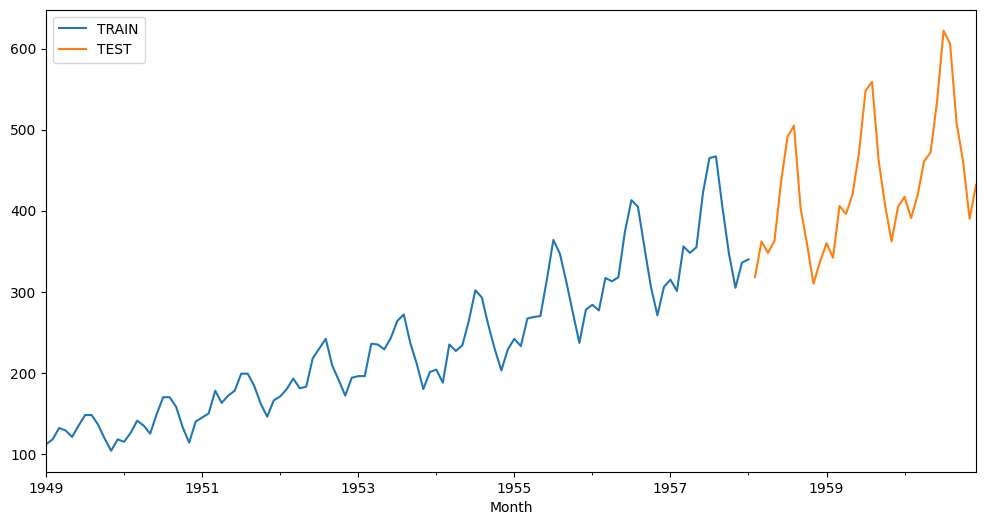

In [31]:
train_data['Thousands of Passengers'].plot(legend=True, figsize=(12,6), label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True, figsize=(12,6), label='TEST')

<Axes: xlabel='Month'>

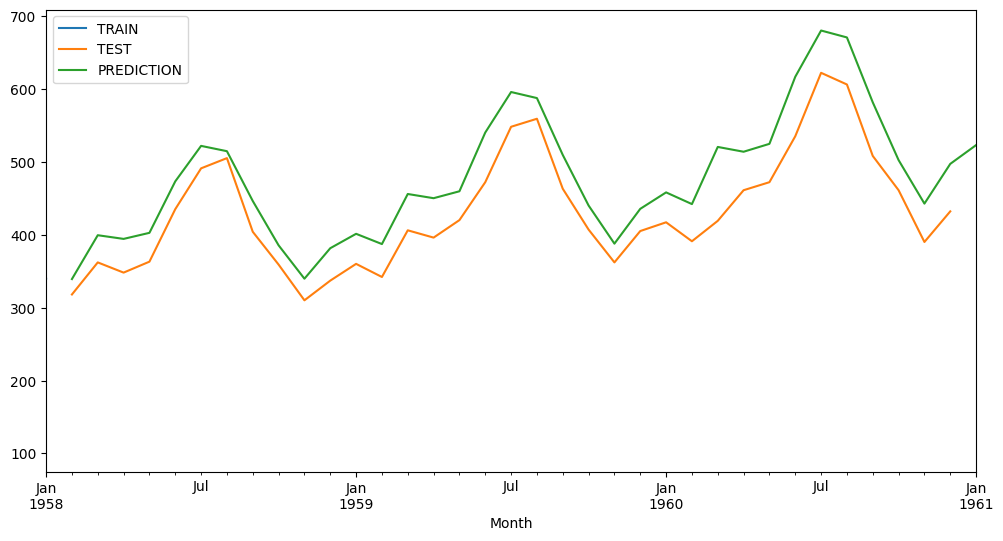

In [33]:
train_data['Thousands of Passengers'].plot(legend=True, figsize=(12,6), label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True, figsize=(12,6), label='TEST')
test_predictions.plot(legend=True, figsize=(12,6), label='PREDICTION', xlim=['1958-01-01','1961-01-01'])